In [64]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

aapl = yf.Ticker("AAPL")

aapl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [8]:
aapl_hist = aapl.history(start="2023-01-01", end='2024-03-31')
aapl_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,129.390730,130.006493,123.322435,124.216293,112117500,0.0,0.0
2023-01-04 00:00:00-05:00,126.023879,127.781801,124.226236,125.497498,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,126.262247,126.897878,123.908429,124.166649,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,125.149878,129.400654,124.037520,128.735229,87754700,0.0,0.0
2023-01-09 00:00:00-05:00,129.579450,132.499385,129.003407,129.261627,70790800,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,171.759995,173.050003,170.059998,172.279999,71106600,0.0,0.0
2024-03-25 00:00:00-04:00,170.570007,171.940002,169.449997,170.850006,54288300,0.0,0.0
2024-03-26 00:00:00-04:00,170.000000,171.419998,169.580002,169.710007,57388400,0.0,0.0


In [10]:
aapl_hist.reset_index(inplace=True)
print(aapl_hist)

                         Date        Open        High         Low       Close  \
0   2023-01-03 00:00:00-05:00  129.390730  130.006493  123.322435  124.216293   
1   2023-01-04 00:00:00-05:00  126.023879  127.781801  124.226236  125.497498   
2   2023-01-05 00:00:00-05:00  126.262247  126.897878  123.908429  124.166649   
3   2023-01-06 00:00:00-05:00  125.149878  129.400654  124.037520  128.735229   
4   2023-01-09 00:00:00-05:00  129.579450  132.499385  129.003407  129.261627   
..                        ...         ...         ...         ...         ...   
306 2024-03-22 00:00:00-04:00  171.759995  173.050003  170.059998  172.279999   
307 2024-03-25 00:00:00-04:00  170.570007  171.940002  169.449997  170.850006   
308 2024-03-26 00:00:00-04:00  170.000000  171.419998  169.580002  169.710007   
309 2024-03-27 00:00:00-04:00  170.410004  173.600006  170.110001  173.309998   
310 2024-03-28 00:00:00-04:00  171.750000  172.229996  170.509995  171.479996   

        Volume  Dividends  

In [11]:
aapl_hist['day_difference'] = aapl_hist['Date'].diff().dt.days
aapl_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_difference
0,2023-01-03 00:00:00-05:00,129.390730,130.006493,123.322435,124.216293,112117500,0.0,0.0,NaN
1,2023-01-04 00:00:00-05:00,126.023879,127.781801,124.226236,125.497498,89113600,0.0,0.0,1.0
2,2023-01-05 00:00:00-05:00,126.262247,126.897878,123.908429,124.166649,80962700,0.0,0.0,1.0
3,2023-01-06 00:00:00-05:00,125.149878,129.400654,124.037520,128.735229,87754700,0.0,0.0,1.0
4,2023-01-09 00:00:00-05:00,129.579450,132.499385,129.003407,129.261627,70790800,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
306,2024-03-22 00:00:00-04:00,171.759995,173.050003,170.059998,172.279999,71106600,0.0,0.0,1.0
307,2024-03-25 00:00:00-04:00,170.570007,171.940002,169.449997,170.850006,54288300,0.0,0.0,3.0
308,2024-03-26 00:00:00-04:00,170.000000,171.419998,169.580002,169.710007,57388400,0.0,0.0,1.0
309,2024-03-27 00:00:00-04:00,170.410004,173.600006,170.110001,173.309998,60273300,0.0,0.0,1.0


In [12]:
aapl_hist['day_difference'].value_counts()

day_difference
1.0    244
3.0     52
4.0     10
2.0      4
Name: count, dtype: int64

In [14]:
data = aapl_hist['Close']
data

0      124.216293
1      125.497498
2      124.166649
3      128.735229
4      129.261627
          ...    
306    172.279999
307    170.850006
308    169.710007
309    173.309998
310    171.479996
Name: Close, Length: 311, dtype: float64

In [15]:
data.shape

(311,)

In [17]:
data = np.reshape(data, (len(data), 1))
data.shape

(311, 1)

In [18]:
data

array([[124.21629333],
       [125.49749756],
       [124.16664886],
       [128.73522949],
       [129.2616272 ],
       [129.83766174],
       [132.5788269 ],
       [132.49937439],
       [133.84014893],
       [135.01210022],
       [134.28709412],
       [134.34667969],
       [136.92893982],
       [140.14682007],
       [141.55712891],
       [140.89167786],
       [142.97735596],
       [144.93391418],
       [142.02392578],
       [143.30509949],
       [144.43733215],
       [149.7905426 ],
       [153.44540405],
       [150.69432068],
       [153.59440613],
       [150.88304138],
       [149.84020996],
       [150.20822144],
       [153.03315735],
       [152.38659668],
       [154.50531006],
       [152.89390564],
       [151.74008179],
       [147.69165039],
       [148.11936951],
       [148.60676575],
       [145.93106079],
       [147.13464355],
       [146.62734985],
       [144.53851318],
       [145.13531494],
       [150.2281189 ],
       [153.01327515],
       [150

In [65]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data

array([[6.73685405e-04],
       [1.80598834e-02],
       [0.00000000e+00],
       [6.19965542e-02],
       [6.91398765e-02],
       [7.69567807e-02],
       [1.14154941e-01],
       [1.13076754e-01],
       [1.31271334e-01],
       [1.47174947e-01],
       [1.37336469e-01],
       [1.38145057e-01],
       [1.73186845e-01],
       [2.16854124e-01],
       [2.35992298e-01],
       [2.26961994e-01],
       [2.55265063e-01],
       [2.81815950e-01],
       [2.42326825e-01],
       [2.59712609e-01],
       [2.75077233e-01],
       [3.47721371e-01],
       [3.97318573e-01],
       [3.59985820e-01],
       [3.99340561e-01],
       [3.62546798e-01],
       [3.48395367e-01],
       [3.53389356e-01],
       [3.91724302e-01],
       [3.82950345e-01],
       [4.11701709e-01],
       [3.89834629e-01],
       [3.74177008e-01],
       [3.19238983e-01],
       [3.25043217e-01],
       [3.31657282e-01],
       [2.95347429e-01],
       [3.11680289e-01],
       [3.04796211e-01],
       [2.76450279e-01],


In [66]:
window_size = 10

X, y = [], []

for i in range(window_size, len(data)):
    X.append(data[i-window_size:i, 0])
    y.append(data[i, 0])

X[:2]

[array([0.00067369, 0.01805988, 0.        , 0.06199655, 0.06913988,
        0.07695678, 0.11415494, 0.11307675, 0.13127133, 0.14717495]),
 array([0.01805988, 0.        , 0.06199655, 0.06913988, 0.07695678,
        0.11415494, 0.11307675, 0.13127133, 0.14717495, 0.13733647])]

In [67]:
X, y = np.array(X), np.array(y)
X[:2]

array([[0.00067369, 0.01805988, 0.        , 0.06199655, 0.06913988,
        0.07695678, 0.11415494, 0.11307675, 0.13127133, 0.14717495],
       [0.01805988, 0.        , 0.06199655, 0.06913988, 0.07695678,
        0.11415494, 0.11307675, 0.13127133, 0.14717495, 0.13733647]])

In [68]:
X.shape

(301, 10)

In [69]:
train_split = 0.8
validation_split = 0.1
test_split = 0.1

train_split_index = int(len(data) * train_split)
validation_split_index = int(len(data) * (train_split + validation_split))

X_train = X[:train_split_index]
Y_train = y[:train_split_index]
X_validation = X[train_split_index:validation_split_index]
Y_validation = y[train_split_index:validation_split_index]
X_test = X[validation_split_index:]
Y_test = y[validation_split_index:]

print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru walidacyjnego:", len(X_validation))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 248
Rozmiar zbioru walidacyjnego: 31
Rozmiar zbioru testowego: 22


In [70]:
X_train[:2]

array([[0.00067369, 0.01805988, 0.        , 0.06199655, 0.06913988,
        0.07695678, 0.11415494, 0.11307675, 0.13127133, 0.14717495],
       [0.01805988, 0.        , 0.06199655, 0.06913988, 0.07695678,
        0.11415494, 0.11307675, 0.13127133, 0.14717495, 0.13733647]])

In [71]:
dates = aapl_hist['Date']
dates

0     2023-01-03 00:00:00-05:00
1     2023-01-04 00:00:00-05:00
2     2023-01-05 00:00:00-05:00
3     2023-01-06 00:00:00-05:00
4     2023-01-09 00:00:00-05:00
                 ...           
306   2024-03-22 00:00:00-04:00
307   2024-03-25 00:00:00-04:00
308   2024-03-26 00:00:00-04:00
309   2024-03-27 00:00:00-04:00
310   2024-03-28 00:00:00-04:00
Name: Date, Length: 311, dtype: datetime64[ns, America/New_York]

In [72]:
dates = dates[window_size:]
print(len(dates))

301


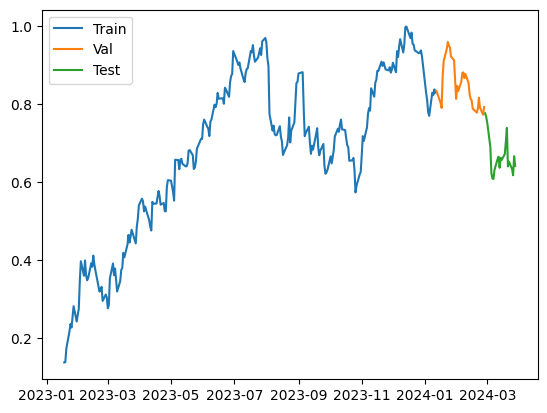

In [73]:
plt.plot(dates[:train_split_index], Y_train)
plt.plot(dates[train_split_index:validation_split_index],Y_validation)
plt.plot(dates[validation_split_index:], Y_test)
plt.legend(['Train', 'Val', 'Test'])

In [74]:
X_train.shape

(248, 10)

In [101]:
X_train = X_train.reshape((248, 10, 1))
X_train.shape

(248, 10, 1)

In [100]:
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=20, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.LSTM(units=20))
model_lstm.add(tf.keras.layers.Dropout(0.2))
# model_lstm.add(tf.keras.layers.Dense(units=2, activation='tanh'))
# model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=1))


model_lstm.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.summary()

history_lstm = model_lstm.fit(X_train, Y_train, epochs=7, batch_size=64, validation_split=0.2)

/home/rol3ert99/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 10, 20)         │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,061 (19.77 KB)

 Trainable params: 5,061 (19.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.5164 - mae: 0.6902 - val_loss: 0.7596 - val_mae: 0.8671
Epoch 2/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4022 - mae: 0.6018 - val_loss: 0.5798 - val_mae: 0.7571
Epoch 3/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2924 - mae: 0.5066 - val_loss: 0.4157 - val_mae: 0.6404
Epoch 4/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2095 - mae: 0.4196 - val_loss: 0.2612 - val_mae: 0.5064
Epoch 5/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1058 - mae: 0.3003 - val_loss: 0.1254 - val_mae: 0.3483
Epoch 6/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0491 - mae: 0.1857 - val_loss: 0.0329 - val_mae: 0.1710
Epoch 7/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0218 - mae: 0.1165 - val_loss: 0.0037 - val_mae: 0.0504


In [91]:
model_lstm.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0148 - mae: 0.1100


[0.01480521634221077, 0.10999686270952225]

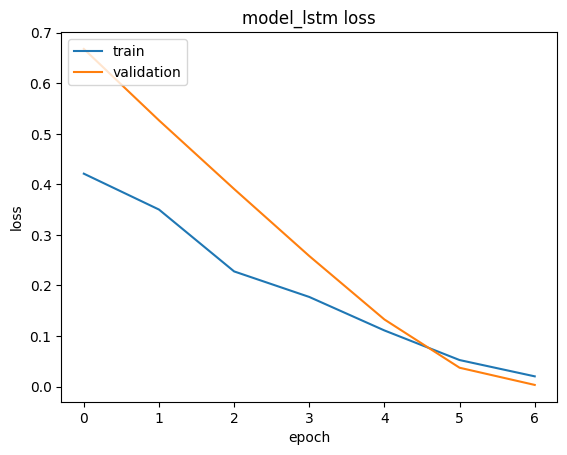

In [92]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model_lstm loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


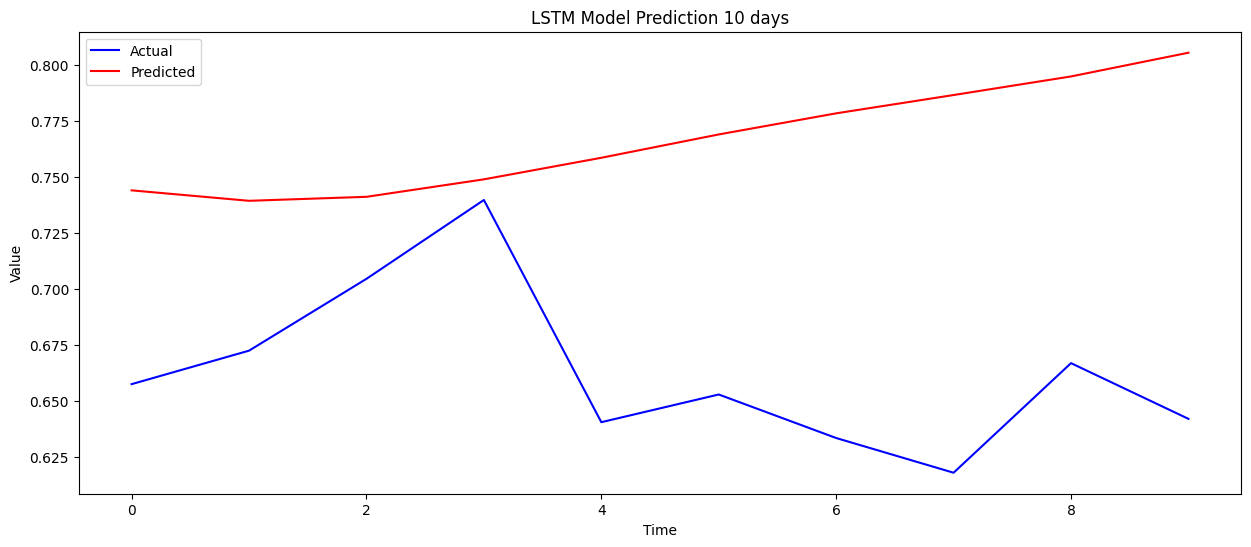

In [98]:
predictions = []
num_predictions = 10

current_window = X_test[12].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

plt.figure(figsize=(15, 6))
plt.plot(Y_test[12:num_predictions+12], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('LSTM Model Prediction 10 days')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()